# import libraries

In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# importing data and assign to variable covid

In [5]:
covid=pd.read_csv('C:\Sathya\DataScience\COVID-19 Cases.csv',sep=',')
covid
covid.head(10)

C:\Users\YB998DQ\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.818200,8.227500,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.126400,33.429900,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.060800,-61.796400,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.109600,-77.297500,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.189900,-88.497600,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
5,Confirmed,NaN,1,0,3/18/2020,Central African Republic,Central African Republic,NaN,NaN,CF,CAF,NaN,6.611100,20.939400,4829764.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
6,Deaths,NaN,0,0,5/2/2020,"Bonaire, Sint Eustatius and Saba, Netherlands",Netherlands,"Bonaire, Sint Eustatius and Saba",NaN,BQ,BES,NaN,12.178400,-68.238500,26221.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
7,Confirmed,NaN,1,0,3/19/2020,Central African Republic,Central African Republic,NaN,NaN,CF,CAF,NaN,6.611100,20.939400,4829764.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
8,Deaths,NaN,5,1,4/13/2020,"Bermuda, United Kingdom",United Kingdom,Bermuda,NaN,BM,BMU,NaN,32.307800,-64.750500,62273.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
9,Confirmed,NaN,18,0,4/29/2020,"New Caledonia, France",France,New Caledonia,NaN,NC,NCL,NaN,-20.904305,165.618042,285491.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM


In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718080 entries, 0 to 718079
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Case_Type                             718080 non-null  object 
 1   People_Total_Tested_Count             2352 non-null    float64
 2   Cases                                 718080 non-null  int64  
 3   Difference                            718080 non-null  int64  
 4   Date                                  718080 non-null  object 
 5   Combined_Key                          718080 non-null  object 
 6   Country_Region                        718080 non-null  object 
 7   Province_State                        680952 non-null  object 
 8   Admin2                                663816 non-null  object 
 9   iso2                                  717672 non-null  object 
 10  iso3                                  717876 non-null  object 
 11  

In [9]:
covid.isna().sum()

Case_Type                                    0
People_Total_Tested_Count               715728
Cases                                        0
Difference                                   0
Date                                         0
Combined_Key                                 0
Country_Region                               0
Province_State                           37128
Admin2                                   54264
iso2                                       408
iso3                                       204
FIPS                                     76092
Lat                                      21420
Long                                     21420
Population_Count                         21420
People_Hospitalized_Cumulative_Count    715728
Data_Source                                  0
Prep_Flow_Runtime                            0
dtype: int64

In [14]:
#covid[covid.notnull().People_Total_Tested_Count]
covid.People_Total_Tested_Count

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
718075   NaN
718076   NaN
718077   NaN
718078   NaN
718079   NaN
Name: People_Total_Tested_Count, Length: 718080, dtype: float64

# Removing columns not needed

In [21]:
#del covid['Prep_Flow_Runtime']
#del covid['Data_Source']
#del covid['Admin2']
#del covid['iso2']
#del covid['iso3']
#del covid['Combined_Key']
covid

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Country_Region,Province_State,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,NaN,NaN,46.818200,8.227500,8654618.0,NaN
1,Deaths,NaN,0,0,3/1/2020,Cyprus,NaN,NaN,35.126400,33.429900,1207361.0,NaN
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,NaN,NaN,17.060800,-61.796400,97928.0,NaN
3,Deaths,NaN,0,0,2/11/2020,Jamaica,NaN,NaN,18.109600,-77.297500,2961161.0,NaN
4,Confirmed,NaN,0,0,2/6/2020,Belize,NaN,NaN,17.189900,-88.497600,397621.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
718075,Confirmed,NaN,0,0,1/22/2020,US,Georgia,13169.0,33.025121,-83.560192,28735.0,NaN
718076,Deaths,NaN,0,0,1/22/2020,US,Oklahoma,40143.0,36.119396,-95.940139,651552.0,NaN
718077,Deaths,NaN,0,0,1/22/2020,US,Wisconsin,55141.0,44.455379,-90.041583,72999.0,NaN
718078,Confirmed,NaN,0,0,1/22/2020,US,Indiana,18149.0,41.278903,-86.646869,22995.0,NaN


In [22]:
covid.isna().sum()

Case_Type                                    0
People_Total_Tested_Count               715728
Cases                                        0
Difference                                   0
Date                                         0
Country_Region                               0
Province_State                           37128
FIPS                                     76092
Lat                                      21420
Long                                     21420
Population_Count                         21420
People_Hospitalized_Cumulative_Count    715728
dtype: int64

# Filling Null Values with mean

In [27]:
covid.dropna(subset=['Province_State'],inplace=True)
covid['People_Total_Tested_Count']=covid['People_Total_Tested_Count'].fillna(covid['People_Total_Tested_Count'].mean())
#covid['Province_State']=covid['Province_State'].fillna(covid['Province_State'].mean())
covid['FIPS']=covid['FIPS'].fillna(covid['FIPS'].mean())
covid['Lat']=covid['Lat'].fillna(covid['Lat'].mean())
covid['Long']=covid['Long'].fillna(covid['Long'].mean())
covid['Population_Count']=covid['Population_Count'].fillna(covid['Population_Count'].mean())
covid['People_Hospitalized_Cumulative_Count']=covid['People_Hospitalized_Cumulative_Count'].fillna(covid['People_Hospitalized_Cumulative_Count'].mean())

covid.isna().sum()

Case_Type                               0
People_Total_Tested_Count               0
Cases                                   0
Difference                              0
Date                                    0
Country_Region                          0
Province_State                          0
FIPS                                    0
Lat                                     0
Long                                    0
Population_Count                        0
People_Hospitalized_Cumulative_Count    0
dtype: int64

In [32]:
covid.groupby('Country_Region').describe()

People_Total_Tested_Count                              \
                                   count          mean           std   
Country_Region                                                         
Australia                         1632.0  81998.648810  1.208179e-09   
Canada                            2448.0  81998.648810  1.280830e-09   
China                             6732.0  81998.648810  1.392722e-08   
Denmark                            408.0  81998.648810  5.536517e-10   
France                            2040.0  81998.648810  1.251772e-09   
Netherlands                        816.0  81998.648810  9.901371e-10   
US                              664836.0  81998.648811  7.139328e+03   
United Kingdom                    2040.0  81998.648810  1.251772e-09   

                                                                    \
                        min          25%          50%          75%   
Country_Region                                                       
Australia       81998.64881  81998.64881  81998.64881  81998.64881   
Canada          81998.64881  81998.64881  81998.64881  81998.64881   
China           81998.64881  81998.64881  81998.64881  81998.64881   
Denmark         81998.64881  81998.64881  81998.64881  81998.64881   
France          81998.64881  81998.64881  81998.64881  81998.64881   
Netherlands     81998.64881  81998.64881  81998.64881  81998.64881   
US                  3.00000  81998.64881  81998.64881  81998.64881   
United Kingdom  81998.64881  81998.64881  81998.64881  81998.64881   

                                 Cases               ... Population_Count  \
                         max     count         mean  ...              75%   
Country_Region                                       ...                    
Australia        81998.64881    1632.0   147.135417  ...       5494100.00   
Canada           81998.64881    2448.0   467.397059  ...       4587588.75   
China            81998.64881    6732.0  1058.855318  ...      59170000.00   
Denmark          81998.64881     408.0    19.977941  ...         56772.00   
France           81998.64881    2040.0    21.261275  ...        375265.00   
Netherlands      81998.64881     816.0     7.338235  ...        121099.50   
US              959071.00000  664836.0    36.077377  ...         80485.00   
United Kingdom   81998.64881    2040.0    16.652941  ...         65720.00   

                            People_Hospitalized_Cumulative_Count               \
                        max                                count         mean   
Country_Region                                                                  
Australia         8118000.0                               1632.0  2043.231293   
Canada           14711827.0                               2448.0  2043.231293   
China           113460000.0                               6732.0  2043.231293   
Denmark             56772.0                                408.0  2043.231293   
France             895308.0                               2040.0  2043.231293   
Netherlands        164100.0                                816.0  2043.231293   
US               10039107.0                             664836.0  2043.231293   
United Kingdom     170499.0                               2040.0  2043.231293   

                                                                     \
                         std          min          25%          50%   
Country_Region                                                        
Australia       5.253942e-11  2043.231293  2043.231293  2043.231293   
Canada          6.254054e-11  2043.231293  2043.231293  2043.231293   
China           2.881038e-10  2043.231293  2043.231293  2043.231293   
Denmark         6.146626e-12  2043.231293  2043.231293  2043.231293   
France          5.867679e-11  2043.231293  2043.231293  2043.231293   
Netherlands     2.297883e-11  2043.231293  2043.231293  2043.231293   
US              4.474770e+02     0.000000  2043.231293  2043.231293   
U

# Visualization of Country_Region and cases (China with maximum cases)

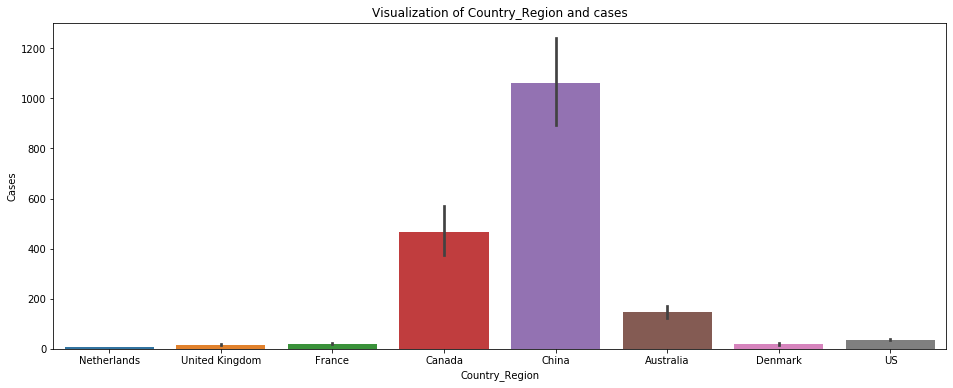

In [33]:
plt.figure(figsize=(16,6))
plt.title ('Visualization of Country_Region and cases')
sns.barplot(x=covid['Country_Region'],y=covid['Cases'])

# Visualization of Country_Region and population data (China with maximum population)

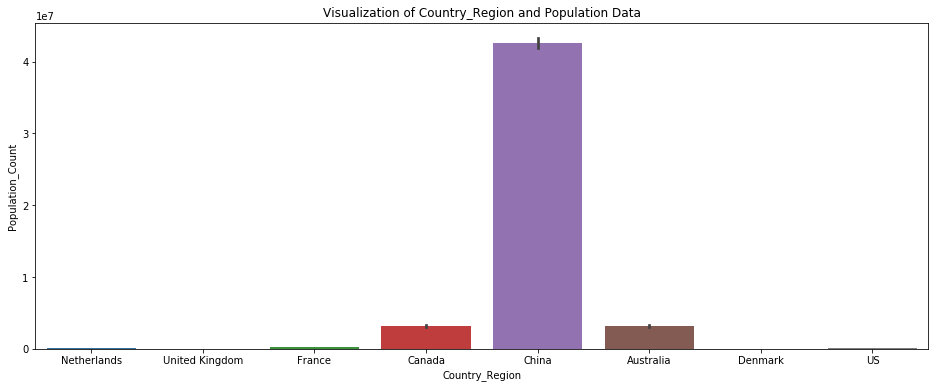

In [34]:
plt.figure(figsize=(16,6))
plt.title ('Visualization of Country_Region and Population Data')
sns.barplot(x=covid['Country_Region'],y=covid['Population_Count'])

# Visualization of people hospitalized in different country

# From Data People hospitalized in different country are same, Which cant be ideal

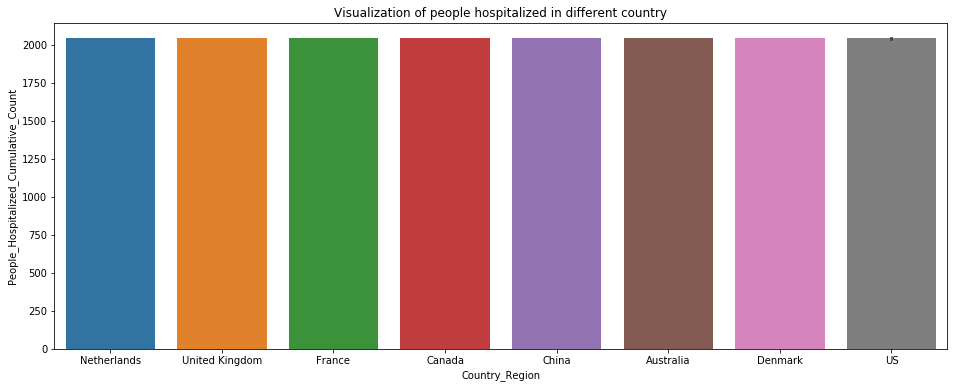

In [39]:
plt.figure(figsize=(16,6))
plt.title ('Visualization of people hospitalized in different country')
sns.barplot(x=covid['Country_Region'],y=covid['People_Hospitalized_Cumulative_Count'])

# Visualization of people tested in different country

# From Data People tested in different country are same-which again is not ideal scenario

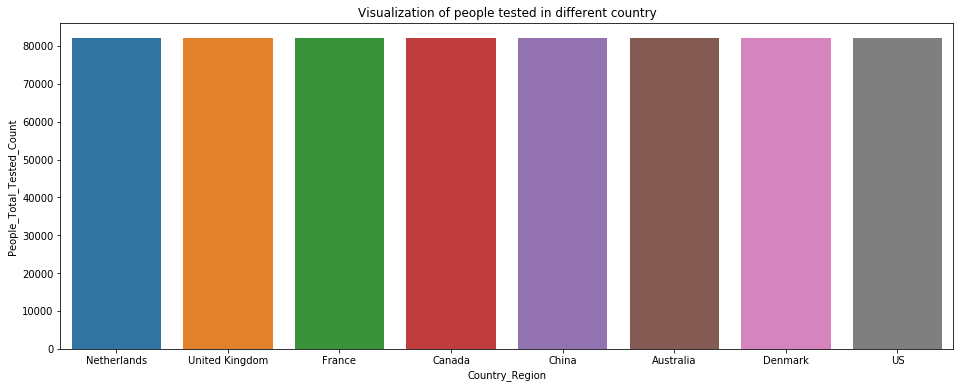

In [37]:
plt.figure(figsize=(16,6))
plt.title ('Visualization of people tested in different country')
sns.barplot(x=covid['Country_Region'],y=covid['People_Total_Tested_Count'])

In [41]:
X = covid.groupby('Date').describe()
X

People_Total_Tested_Count                                           \
                              count          mean           std          min   
Date                                                                           
1/22/2020                    6676.0  81998.648810  1.381080e-08  81998.64881   
1/23/2020                    6676.0  81998.648810  1.381080e-08  81998.64881   
1/24/2020                    6676.0  81998.648810  1.381080e-08  81998.64881   
1/25/2020                    6676.0  81998.648810  1.381080e-08  81998.64881   
1/26/2020                    6676.0  81998.648810  1.381080e-08  81998.64881   
...                             ...           ...           ...          ...   
4/7/2020                     6676.0  81998.648810  1.381080e-08  81998.64881   
4/8/2020                     6676.0  81998.648810  1.381080e-08  81998.64881   
4/9/2020                     6676.0  81998.648810  1.381080e-08  81998.64881   
5/1/2020                     6676.0  82585.792508  2.121838e+04     57.00000   
5/2/2020                     6676.0  82665.042658  2.218022e+04     57.00000   

                                                                 Cases  \
                   25%          50%          75%           max   count   
Date                                                                     
1/22/2020  81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
1/23/2020  81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
1/24/2020  81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
1/25/2020  81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
1/26/2020  81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
...                ...          ...          ...           ...     ...   
4/7/2020   81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
4/8/2020   81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
4/9/2020   81998.64881  81998.64881  81998.64881   81998.64881  6676.0   
5/1/2020   81998.64881  81998.64881  81998.64881  927438.00000  6676.0   
5/2/2020   81998.64881  81998.64881  81998.64881  959071.00000  6676.0   

                       ... Population_Count               \
                 mean  ...              75%          max   
Date                   ...                                 
1/22/2020    0.084781  ...          87808.0  113460000.0   
1/23/2020    0.099161  ...          87808.0  113460000.0   
1/24/2020    0.142001  ...          87808.0  113460000.0   
1/25/2020    0.217196  ...          87808.0  113460000.0   
1/26/2020    0.320701  ...          87808.0  113460000.0   
...               ...  ...              ...          ...   
4/7/2020    78.706411  ...          87808.0  113460000.0   
4/8/2020    83.976333  ...          87808.0  113460000.0   
4/9/2020    89.666866  ...          87808.0  113460000.0   
5/1/2020   198.752546  ...          87808.0  113460000.0   
5/2/2020   203.585830  ...          87808.0  113460000.0   

          People_Hospitalized_Cumulative_Count                             \
                                         count         mean           std   
Date                                                                        
1/22/2020                               6676.0  2043.231293  2.835562e-10   
1/23/2020                               6676.0  2043.231293  2.835562e-10   
1/24/2020                               6676.0  2043.231293  2.835562e-10   
1/25/2020                               6676.0  2043.231293  2.835562e-10   
1/26/2020                               6676.0  2043.231293  2.835562e-10   
...                                        ...          ...           ...   
4/7/2020                                6676.0  2043.231293  2.835562e-10   
4/8/2020                                6676.0  2043.231293  2.835562e-10   
4/9/2020                                6676.0  2043.231293  2.835562e-10   
5/1/2020                                6676.0  2045.426334  1.158564e+03   
5/2/2020  

# From the above distribution of data by imputing mean is not giving ideal answers